In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_with_singleton.csv")
df

,Sample,CDR3,nReads_TCR,nReads_CATT,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,...,total_reads_IMREP,total_reads_TRUST4,total_reads_CATT,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,frequency_CATT,repertoire_type,class
0,SRR5233637,CASSPRVTSGTYEQYF,32.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3049330.0,...,315.0,600.0,5872.0,0.000010,0.0,0.0,0.000000,0.0,high_SDI,T_cell_poor_high_SDI
1,SRR5233637,CASSYSDRGGQPQHF,13.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3049330.0,...,315.0,600.0,5872.0,0.000004,0.0,0.0,0.000000,0.0,high_SDI,T_cell_poor_high_SDI
2,SRR5233637,CASKVALGGETQYF,25.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3049330.0,...,315.0,600.0,5872.0,0.000008,0.0,0.0,0.000000,0.0,high_SDI,T_cell_poor_high_SDI
3,SRR5233637,CASRAPGTGTLGSPLHF,66.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3049330.0,...,315.0,600.0,5872.0,0.000022,0.0,0.0,0.000000,0.0,high_SDI,T_cell_poor_high_SDI
4,SRR5233637,CASSSGQGGPSTEAFF,52.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3049330.0,...,315.0,600.0,5872.0,0.000017,0.0,0.0,0.000000,0.0,high_SDI,T_cell_poor_high_SDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620251,sample14,CASSF?SGAPQETQYF,0.0,0.0,0.0,0.0,1.0,melanoma,T_cell_poor,749686.0,...,152.0,394.0,834.0,0.000000,0.0,0.0,0.002538,0.0,high_SDI,T_cell_poor_high_SDI
620252,sample14,CASSVEGYEQYF,0.0,0.0,0.0,0.0,2.0,melanoma,T_cell_poor,749686.0,...,152.0,394.0,834.0,0.000000,0.0,0.0,0.005076,0.0,high_SDI,T_cell_poor_high_SDI
620253,sample14,CASSLFRGEQYF,0.0,0.0,0.0,0.0,1.0,melanoma,T_cell_poor,749686.0,...,152.0,394.0,834.0,0.000000,0.0,0.0,0.002538,0.0,high_SDI,T_cell_poor_high_SDI
620254,sample14,CASSRRWGPVEETQYF,0.0,0.0,0.0,0.0,1.0,melanoma,T_cell_poor,749686.0,...,152.0,394.0,834.0,0.000000,0.0,0.0,0.002538,0.0,high_SDI,T_cell_poor_high_SDI


## MIXCR

In [3]:
MIXCR = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','nReads_TCR','nReads_MIXCR']]
MIXCR = MIXCR.loc[(MIXCR['nReads_TCR'] != 0) & (MIXCR['nReads_MIXCR'] != 0)]

In [4]:
# Calculate total number of reads in each sample
total_reads_MIXCR = MIXCR[['Sample','nReads_TCR','nReads_MIXCR']].groupby('Sample').sum().rename(columns={'nReads_TCR':'total_reads_TCR','nReads_MIXCR':'total_reads_MIXCR'})

# Merge dataframes 
MIXCR = pd.merge(MIXCR, total_reads_MIXCR, how='outer', on=['Sample']).fillna(0)

# Renormalize the frequency
MIXCR['renormalized_frequency_TCR'] = MIXCR['nReads_TCR'] / (MIXCR['total_reads_TCR'] * 1.0)
MIXCR['renormalized_frequency_MIXCR'] = MIXCR['nReads_MIXCR'] / (MIXCR['total_reads_MIXCR'] * 1.0)
MIXCR.fillna(0, inplace=True)

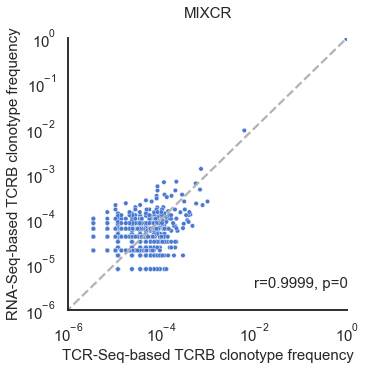

In [6]:
T_cell_rich_low_SDI_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_rich_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_MIXCR', hue='class', s=20, data=T_cell_rich_low_SDI_MIXCR, palette=['#4878d0'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_low_SDI_MIXCR['renormalized_frequency_TCR'], T_cell_rich_low_SDI_MIXCR['renormalized_frequency_MIXCR'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('MIXCR',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9a.png",bbox_inches="tight")

plt.show()

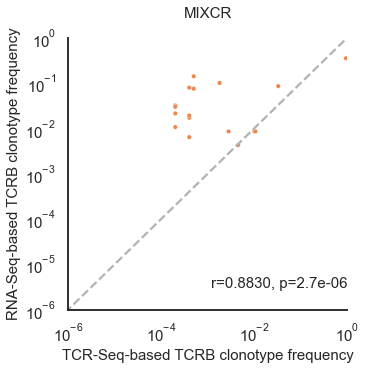

In [7]:
T_cell_poor_low_SDI_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_poor_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_MIXCR', hue='class', s=20, data=T_cell_poor_low_SDI_MIXCR, palette=['#ee854a'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_low_SDI_MIXCR['renormalized_frequency_TCR'], T_cell_poor_low_SDI_MIXCR['renormalized_frequency_MIXCR'])
plt.text(0.0012,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)
    
g.axes.set_title('MIXCR',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9e.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9e.png",bbox_inches="tight")

plt.show()

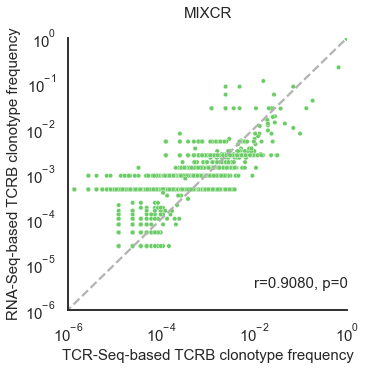

In [8]:
T_cell_rich_high_SDI_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_rich_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_MIXCR', hue='class', s=20, data=T_cell_rich_high_SDI_MIXCR, palette=['#6acc64'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_high_SDI_MIXCR['renormalized_frequency_TCR'], T_cell_rich_high_SDI_MIXCR['renormalized_frequency_MIXCR'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('MIXCR',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9i.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9i.png",bbox_inches="tight")

plt.show()

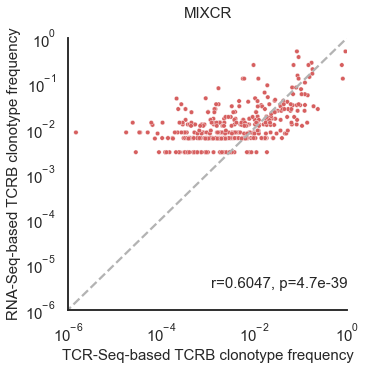

In [9]:
T_cell_poor_high_SDI_MIXCR = MIXCR.loc[(MIXCR['class'] == 'T_cell_poor_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_MIXCR', hue='class', s=20, data=T_cell_poor_high_SDI_MIXCR, palette=['#d65f5f'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_high_SDI_MIXCR['renormalized_frequency_TCR'], T_cell_poor_high_SDI_MIXCR['renormalized_frequency_MIXCR'])
plt.text(0.0012,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('MIXCR',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9m.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9m.png",bbox_inches="tight")

plt.show()

## IMREP

In [10]:
IMREP = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','nReads_TCR','nReads_IMREP']]
IMREP = IMREP.loc[(IMREP['nReads_TCR'] != 0) & (IMREP['nReads_IMREP'] != 0)]

In [11]:
# Calculate total number of reads in each sample
total_reads_IMREP = IMREP[['Sample','nReads_TCR','nReads_IMREP']].groupby('Sample').sum().rename(columns={'nReads_TCR':'total_reads_TCR','nReads_IMREP':'total_reads_IMREP'})

# Merge dataframes 
IMREP = pd.merge(IMREP, total_reads_IMREP, how='outer', on=['Sample']).fillna(0)

# Renormalize the frequency
IMREP['renormalized_frequency_TCR'] = IMREP['nReads_TCR'] / (IMREP['total_reads_TCR'] * 1.0)
IMREP['renormalized_frequency_IMREP'] = IMREP['nReads_IMREP'] / (IMREP['total_reads_IMREP'] * 1.0)
IMREP.fillna(0, inplace=True)

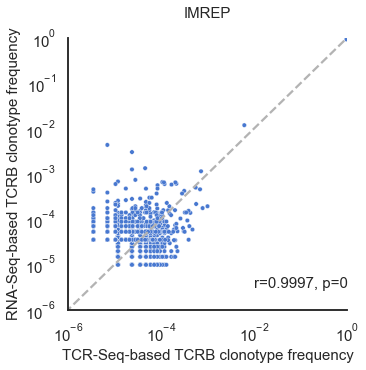

In [12]:
T_cell_rich_low_SDI_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_rich_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_IMREP', hue='class', s=20, data=T_cell_rich_low_SDI_IMREP, palette=['#4878d0'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_low_SDI_IMREP['renormalized_frequency_TCR'], T_cell_rich_low_SDI_IMREP['renormalized_frequency_IMREP'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('IMREP',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9b.png",bbox_inches="tight")

plt.show()

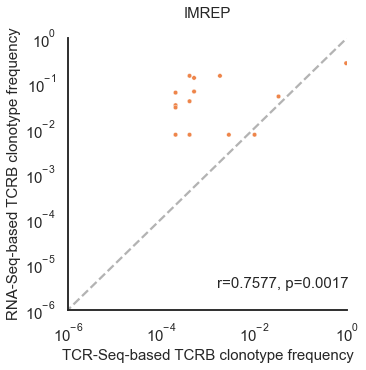

In [13]:
T_cell_poor_low_SDI_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_poor_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_IMREP', hue='class', s=20, data=T_cell_poor_low_SDI_IMREP, palette=['#ee854a'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_low_SDI_IMREP['renormalized_frequency_TCR'], T_cell_poor_low_SDI_IMREP['renormalized_frequency_IMREP'])
plt.text(0.0016,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('IMREP',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9f.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9f.png",bbox_inches="tight")

plt.show()

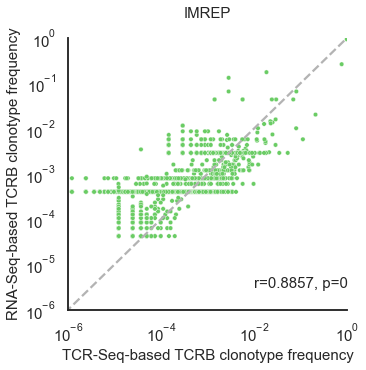

In [14]:
T_cell_rich_high_SDI_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_rich_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_IMREP', hue='class', s=20, data=T_cell_rich_high_SDI_IMREP, palette=['#6acc64'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_high_SDI_IMREP['renormalized_frequency_TCR'], T_cell_rich_high_SDI_IMREP['renormalized_frequency_IMREP'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('IMREP',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9j.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9j.png",bbox_inches="tight")

plt.show()

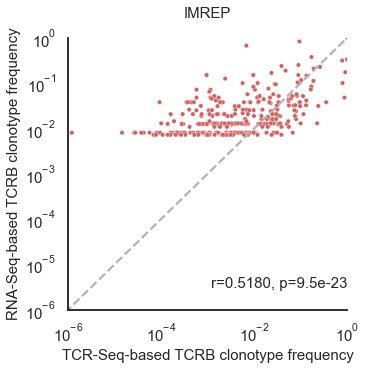

In [15]:
T_cell_poor_high_SDI_IMREP = IMREP.loc[(IMREP['class'] == 'T_cell_poor_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_IMREP', hue='class', s=20, data=T_cell_poor_high_SDI_IMREP, palette=['#d65f5f'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_high_SDI_IMREP['renormalized_frequency_TCR'], T_cell_poor_high_SDI_IMREP['renormalized_frequency_IMREP'])
plt.text(0.0012,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('IMREP',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9n.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9n.png",bbox_inches="tight")

plt.show()

## TRUST4

In [16]:
TRUST4 = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','nReads_TCR','nReads_TRUST4']]
TRUST4 = TRUST4.loc[(TRUST4['nReads_TCR'] != 0) & (TRUST4['nReads_TRUST4'] != 0)]

In [17]:
# Calculate total number of reads in each sample
total_reads_TRUST4 = TRUST4[['Sample','nReads_TCR','nReads_TRUST4']].groupby('Sample').sum().rename(columns={'nReads_TCR':'total_reads_TCR','nReads_TRUST4':'total_reads_TRUST4'})

# Merge dataframes 
TRUST4 = pd.merge(TRUST4, total_reads_TRUST4, how='outer', on=['Sample']).fillna(0)

# Renormalize the frequency
TRUST4['renormalized_frequency_TCR'] = TRUST4['nReads_TCR'] / (TRUST4['total_reads_TCR'] * 1.0)
TRUST4['renormalized_frequency_TRUST4'] = TRUST4['nReads_TRUST4'] / (TRUST4['total_reads_TRUST4'] * 1.0)
TRUST4.fillna(0, inplace=True)

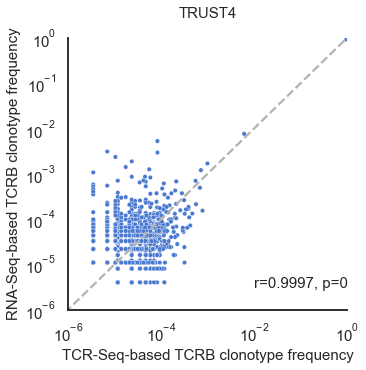

In [18]:
T_cell_rich_low_SDI_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_rich_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_TRUST4', hue='class', s=20, data=T_cell_rich_low_SDI_TRUST4, palette=['#4878d0'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_low_SDI_TRUST4['renormalized_frequency_TCR'], T_cell_rich_low_SDI_TRUST4['renormalized_frequency_TRUST4'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('TRUST4',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9c.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9c.png",bbox_inches="tight")

plt.show()

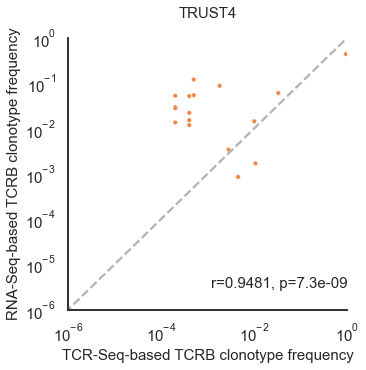

In [19]:
T_cell_poor_low_SDI_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_poor_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_TRUST4', hue='class', s=20, data=T_cell_poor_low_SDI_TRUST4, palette=['#ee854a'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_low_SDI_TRUST4['renormalized_frequency_TCR'], T_cell_poor_low_SDI_TRUST4['renormalized_frequency_TRUST4'])
plt.text(0.0012,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)
    
g.axes.set_title('TRUST4',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9g.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9g.png",bbox_inches="tight")

plt.show()

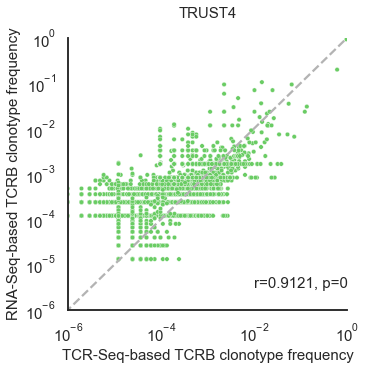

In [20]:
T_cell_rich_high_SDI_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_rich_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_TRUST4', hue='class', s=20, data=T_cell_rich_high_SDI_TRUST4, palette=['#6acc64'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_high_SDI_TRUST4['renormalized_frequency_TCR'], T_cell_rich_high_SDI_TRUST4['renormalized_frequency_TRUST4'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('TRUST4',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9k.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9k.png",bbox_inches="tight")

plt.show()

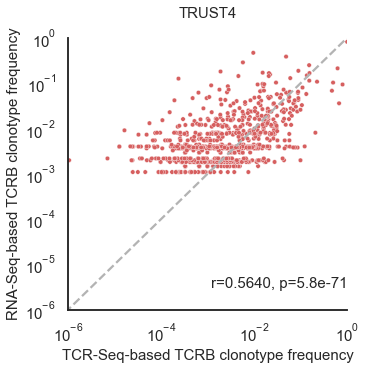

In [21]:
T_cell_poor_high_SDI_TRUST4 = TRUST4.loc[(TRUST4['class'] == 'T_cell_poor_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_TRUST4', hue='class', s=20, data=T_cell_poor_high_SDI_TRUST4, palette=['#d65f5f'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_high_SDI_TRUST4['renormalized_frequency_TCR'], T_cell_poor_high_SDI_TRUST4['renormalized_frequency_TRUST4'])
plt.text(0.0012,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('TRUST4',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9o.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9o.png",bbox_inches="tight")

plt.show()

## CATT

In [22]:
CATT = df[['Sample','class','tissue','tissue_type','repertoire_type','CDR3','nReads_TCR','nReads_CATT']]
CATT = CATT.loc[(CATT['nReads_TCR'] != 0) & (CATT['nReads_CATT'] != 0)]

In [23]:
# Calculate total number of reads in each sample
total_reads_CATT = CATT[['Sample','nReads_TCR','nReads_CATT']].groupby('Sample').sum().rename(columns={'nReads_TCR':'total_reads_TCR','nReads_CATT':'total_reads_CATT'})

# Merge dataframes 
CATT = pd.merge(CATT, total_reads_CATT, how='outer', on=['Sample']).fillna(0)

# Renormalize the frequency
CATT['renormalized_frequency_TCR'] = CATT['nReads_TCR'] / (CATT['total_reads_TCR'] * 1.0)
CATT['renormalized_frequency_CATT'] = CATT['nReads_CATT'] / (CATT['total_reads_CATT'] * 1.0)
CATT.fillna(0, inplace=True)

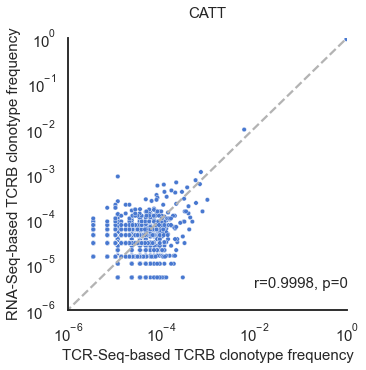

In [24]:
T_cell_rich_low_SDI_CATT = CATT.loc[(CATT['class'] == 'T_cell_rich_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_CATT', hue='class', s=20, data=T_cell_rich_low_SDI_CATT, palette=['#4878d0'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_low_SDI_CATT['renormalized_frequency_TCR'], T_cell_rich_low_SDI_CATT['renormalized_frequency_CATT'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('CATT',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9d.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9d.png",bbox_inches="tight")

plt.show()

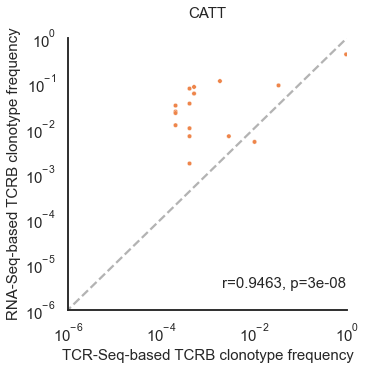

In [25]:
T_cell_poor_low_SDI_CATT = CATT.loc[(CATT['class'] == 'T_cell_poor_low_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_CATT', hue='class', s=20, data=T_cell_poor_low_SDI_CATT, palette=['#ee854a'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_low_SDI_CATT['renormalized_frequency_TCR'], T_cell_poor_low_SDI_CATT['renormalized_frequency_CATT'])
plt.text(0.002,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

g.axes.set_title('CATT',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9h.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9h.png",bbox_inches="tight")

plt.show()

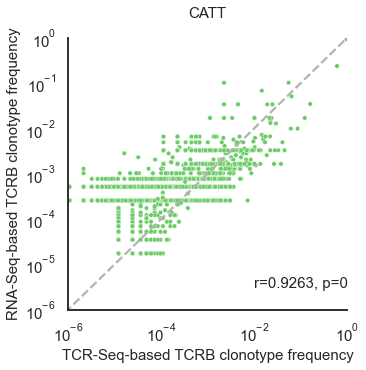

In [26]:
T_cell_rich_high_SDI_CATT = CATT.loc[(CATT['class'] == 'T_cell_rich_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_CATT', hue='class', s=20, data=T_cell_rich_high_SDI_CATT, palette=['#6acc64'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_rich_high_SDI_CATT['renormalized_frequency_TCR'], T_cell_rich_high_SDI_CATT['renormalized_frequency_CATT'])
plt.text(0.01,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)
    
g.axes.set_title('CATT',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9l.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9l.png",bbox_inches="tight")

plt.show()

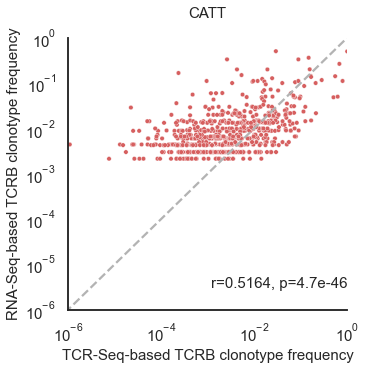

In [27]:
T_cell_poor_high_SDI_CATT = CATT.loc[(CATT['class'] == 'T_cell_poor_high_SDI')]
f, ax = plt.subplots(figsize=(5,5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='renormalized_frequency_TCR', y='renormalized_frequency_CATT', hue='class', s=20, data=T_cell_poor_high_SDI_CATT, palette=['#d65f5f'])

g = sns.lineplot(x=range(0,2),y=range(0,2),color=".7")
g.lines[0].set_linestyle("--")

ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(0.000001, 1)
plt.ylim(0.000001, 1)

r, p = stats.pearsonr(T_cell_poor_high_SDI_CATT['renormalized_frequency_TCR'], T_cell_poor_high_SDI_CATT['renormalized_frequency_CATT'])
plt.text(0.0012,0.000003,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)
    
g.axes.set_title('CATT',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based TCRB clonotype frequency",fontsize=15)
g.set_ylabel("RNA-Seq-based TCRB clonotype frequency",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
g.legend_.remove()
sns.despine()

plt.savefig("../figures/supplementary/figureS9/figureS9p.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS9/figureS9p.png",bbox_inches="tight")

plt.show()